In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('dataset/cookie_cats.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [4]:
df.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


Text(0,0.5,'Number of Players')

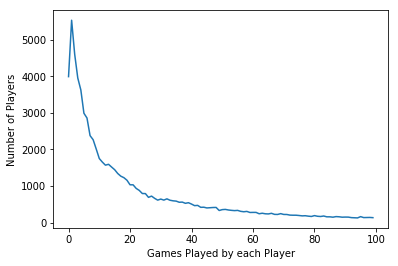

In [5]:
%matplotlib inline 
plot_df = df.groupby('sum_gamerounds').userid.count()

#distribution of players that played 0 to 100 game rounds
ax = plot_df.head(100).plot(x='sum_gamerounds', y='userid')
ax.set_xlabel("Games Played by each Player")
ax.set_ylabel("Number of Players")

In [6]:
df['retention_1'].mean()
#1 day retention

0.4452095044850259

In [7]:
df.groupby('version')['retention_1'].mean()

version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64

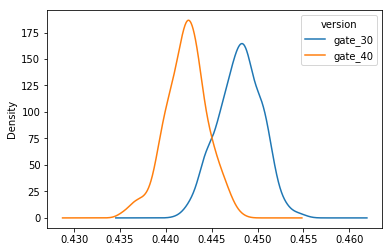

In [8]:
#Now for 7 day retention
boot_1d = []
for i in range(500):
    boot_mean = df.sample(frac=1, replace=True).groupby('version')['retention_1'].mean()
    boot_1d.append(boot_mean)
    
boot_1d = pd.DataFrame(boot_1d)
    
#Kernel Density Estimate plot of the distributions
boot_1d.plot.kde()

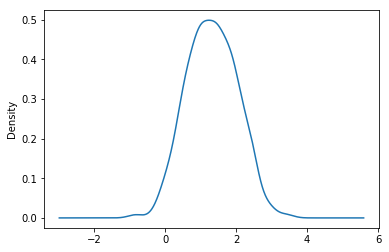

In [9]:
boot_1d['diff'] = (boot_1d['gate_30'] - boot_1d['gate_40']) / boot_1d['gate_40'] * 100
ax = boot_1d['diff'].plot.kde()

In [10]:
prob = (boot_1d['diff'] > 0.0).mean()
prob

0.974

In [11]:
df.groupby('version')['retention_7'].mean()

version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64

In [19]:
boot_7d = []
for i in range(500):
    boot_mean = df.sample(frac=1, replace=True).groupby('version')['retention_7'].mean()
    boot_7d.append(boot_mean)

In [20]:
boot_7d = pd.DataFrame(boot_7d)
boot_7d['diff'] = (boot_7d['gate_30'] - boot_7d['gate_40']) / boot_7d['gate_40'] * 100

Text(0.5,0,'% difference in means')

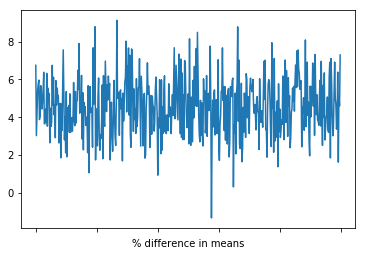

In [21]:
ax = boot_7d['diff'].plot()
ax.set_xlabel("% difference in means")

In [22]:
prob = (boot_7d['diff'] > 0).sum() / len(boot_7d['diff'])
print(prob)

0.998


In [ ]:
#The above analysis tells us that when the gate which interrupts the game is placed at level 30 rather than level 40, the player
#retention is higher i.e. the player is would rather see some obstacle than just going to level 40 uninterrupted. By forcing 
#players to take a break when they reach a gate, their enjoyment of the game is prolonged